In [36]:
# Import libraries
import pandas as pd

In [37]:
# Read data
data = pd.read_parquet('../data/yellow_tripdata_2023-07.parquet')

In [38]:
# Display a sample of data
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-07-01 00:29:59,2023-07-01 00:40:15,1.0,1.80,1.0,N,140,263,1,12.1,3.5,0.5,5.10,0.0,1.0,22.20,2.5,0.0
1,2,2023-07-01 00:03:25,2023-07-01 00:23:44,1.0,2.31,1.0,N,163,163,2,19.1,1.0,0.5,0.00,0.0,1.0,24.10,2.5,0.0
2,2,2023-07-01 00:38:29,2023-07-01 00:48:53,1.0,2.36,1.0,N,142,262,1,13.5,1.0,0.5,3.70,0.0,1.0,22.20,2.5,0.0
3,2,2023-07-01 00:14:16,2023-07-01 00:29:13,1.0,4.36,1.0,N,68,24,1,19.8,1.0,0.5,4.96,0.0,1.0,29.76,2.5,0.0
4,1,2023-07-01 00:11:15,2023-07-01 00:20:47,0.0,1.60,1.0,N,161,107,1,11.4,3.5,0.5,3.25,0.0,1.0,19.65,2.5,0.0


## Identify dimentions 

As per the data dictionary, these 4 fields can be identified as dimentions

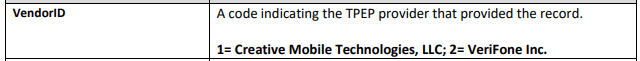

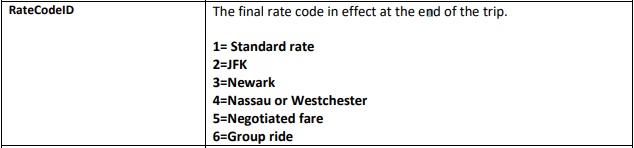

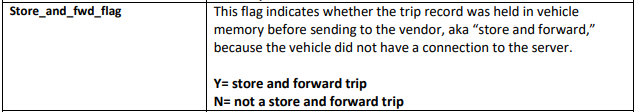

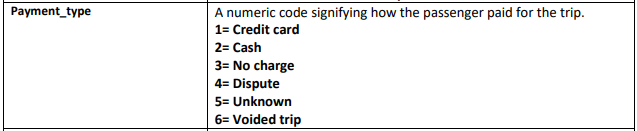



## Create data model

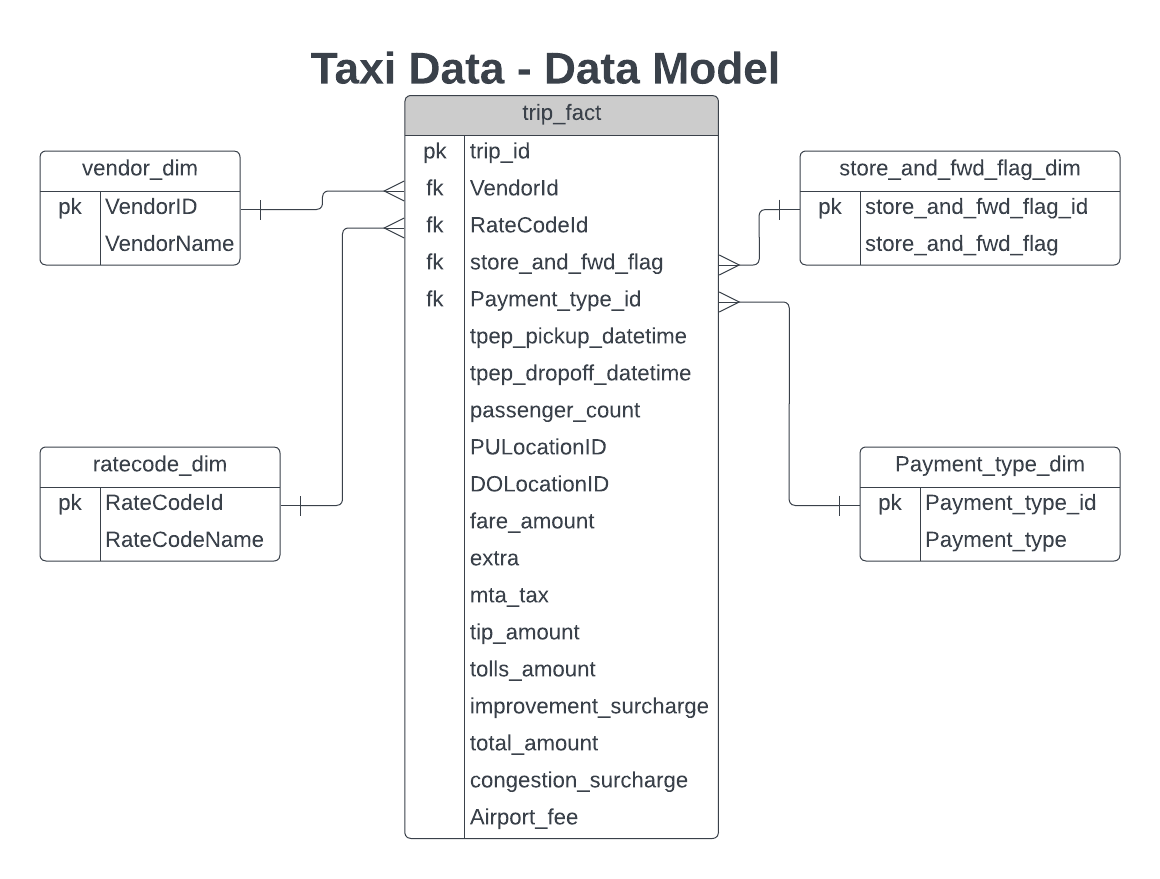


In [39]:
# Explore data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907108 entries, 0 to 2907107
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [40]:
# Create primary key of fact table 

data['trip_id'] = data.index

In [41]:
data.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          85086
trip_distance                0
RatecodeID               85086
store_and_fwd_flag       85086
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     85086
Airport_fee              85086
trip_id                      0
dtype: int64

In [53]:
# Explore the Null
data[data['RatecodeID'].isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_id
2822022,1,2023-07-01 00:44:16,2023-07-01 01:05:57,NaN,12.30,NaN,None,138,209,0,47.80,7.75,0.5,11.91,0.00,1.0,71.46,NaN,NaN,2822022
2822023,2,2023-07-01 00:30:59,2023-07-01 00:59:36,NaN,6.50,NaN,None,163,223,0,19.67,0.00,0.5,3.55,0.00,1.0,27.22,NaN,NaN,2822023
2822024,2,2023-07-01 00:17:36,2023-07-01 00:35:09,NaN,4.86,NaN,None,148,236,0,26.17,0.00,0.5,4.00,0.00,1.0,34.17,NaN,NaN,2822024
2822025,2,2023-07-01 00:05:39,2023-07-01 00:19:40,NaN,3.35,NaN,None,226,198,0,15.98,0.00,0.5,2.00,0.00,1.0,19.48,NaN,NaN,2822025
2822026,1,2023-07-01 00:35:43,2023-07-01 01:09:49,NaN,18.70,NaN,None,132,262,0,70.00,1.75,0.5,12.34,6.55,1.0,94.64,NaN,NaN,2822026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907103,2,2023-07-31 23:18:11,2023-07-31 23:18:23,NaN,0.00,NaN,None,106,106,0,21.58,0.00,0.5,0.00,0.00,1.0,23.08,NaN,NaN,2907103
2907104,2,2023-07-31 23:29:31,2023-07-31 23:51:17,NaN,4.97,NaN,None,238,243,0,22.12,0.00,0.5,0.00,0.00,1.0,23.62,NaN,NaN,2907104
2907105,2,2023-07-31 23:16:57,2023-07-31 23:17:25,NaN,0.03,NaN,None,141,141,0,23.93,0.00,0.5,0.00,0.00,1.0,27.93,NaN,NaN,2907105
2907106,2,2023-07-31 23:29:00,2023-07-31 23:46:00,NaN,3.24,NaN,None,65,62,0,9.54,0.00,0.5,3.00,0.00,1.0,14.04,NaN,NaN,2907106


In [76]:
# Create dim tables

vendor_code_names = {
    'VendorId': [1, 2],
    'VendorName': ["Creative Mobile Technologies, LLC", "VeriFone Inc."]
}

rate_code_names = {
    'RatecodeId': [1, 2, 3, 4, 5, 6],
    'RatecodeName': ["Standard rate", "JFK", "Newark", "Nassau or Westchester", "Negotiated fare", "Group ride"]
}

store_and_fwd_flag_names = {
    "store_and_fwd_flag_id": ['Y', 'N'],
    "store_and_fwd_flag_name": ['store and forward trip', 'not a store and forward trip']
}

payment_type_names = {
    "Payment_type_id": [1, 2, 3, 4, 5, 6],
    "Payment_type_name": ["Credit card", "Cash", "No charge", "Dispute", "Unknown", "Voided trip"]
}

vendor_dim = pd.DataFrame(vendor_code_names)
ratecode_dim = pd.DataFrame(rate_code_names)
store_and_fwd_flag_dim = pd.DataFrame(store_and_fwd_flag_names)
payment_type_dim = pd.DataFrame(payment_type_names)